In [9]:
import networkx as nx
import warnings
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
warnings.filterwarnings('ignore')

In [10]:
%matplotlib inline

In [11]:
import networkx as nx

# Файлаас сүлжээг унших функц
def read_net(filename):
    # Хоосон график үүсгэх
    g = nx.Graph()

    # Тодорхой файлыг уншихад нээнэ
    with open(filename) as f:
        # Эхний мөрийг (глобал мэдээлэл) уншиж, тооцоолохгүй
        f.readline()

        # Файлын бүх мөрийг дамжуулан уншина
        for l in f:
            # Мөрийг хэсэгт хуваана
            l = l.split(",")
            # Хоёр зангилааны хооронд ирмэг нэмнэ
            g.add_edge(l[0], l[1])

    # Уншсан графикийг буцаана
    return g

# Game of Thrones-ийн 6-р улирлын өгөгдөл
season = 6
# Тухайн CSV файлаас ирмэгийг уншина
g = read_net(f'/content/got-s{season}-edges.csv')

# Гэрийн мэдээллийг хадгалах үүргүүдийг үүсгэнэ
houses = {}

# Узагч файлыг уншихад нээнэ
with open(f'/content/got-s{season}-nodes.csv') as f:
    # Узагч файлын бүх мөрийг дамжуулан уншина
    for l in f:
        # Мөрийг зангилааны нэр болон гэрийн мэдээлэлд хуваана
        node, _, house = l.rstrip().split(",")
        # Зангилааг графикт нэмнэ, гэрийн мэдээллийг атрибут болгон хадгална
        g.add_node(node, house=house)

# Узагчийн байрлал тооцоолох
pos = nx.spring_layout(g)

In [12]:
# Жижиг хэмжээний графыг дүрслэж харуулах зорилготойгоор бичсэн нэмэлт функц
def draw_net(G, pos, measures, measure_name):
    # Зургийн хэмжээг 20x20 инчээр тохируулах
    plt.figure(figsize=(20,20))

    # Графын зангилаануудыг (nodes) зураглах
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma,
                                   node_color=list(measures.values()),  # Өнгийг хэмжилтийн утгаараа тохируулах
                                   nodelist=measures.keys())  # Зангилаануудыг тодорхойлох

    # Өнгөний хэмжээг логарифм тохиргоогоор нормчлох
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))

    # Графын зангилаанууд дээр нэр (labels) оруулах
    labels = nx.draw_networkx_labels(G, pos)

    # Графын ирмэгүүдийг (edges) зураглах, тунгалаг байдлыг 0.2-р тохируулах
    edges = nx.draw_networkx_edges(G, pos, alpha=0.2)

    # Графын гарчгийг (title) харуулах
    plt.title(measure_name)

    # Өнгөний тайлбар (colorbar) нэмэх
    plt.colorbar(nodes)

    # Тэнхлэгүүдийг харуулахгүй болгож графыг цэвэрхэн харагдуулахаар тохируулах
    plt.axis('off')

    # Графыг дүрслэх
    plt.show()


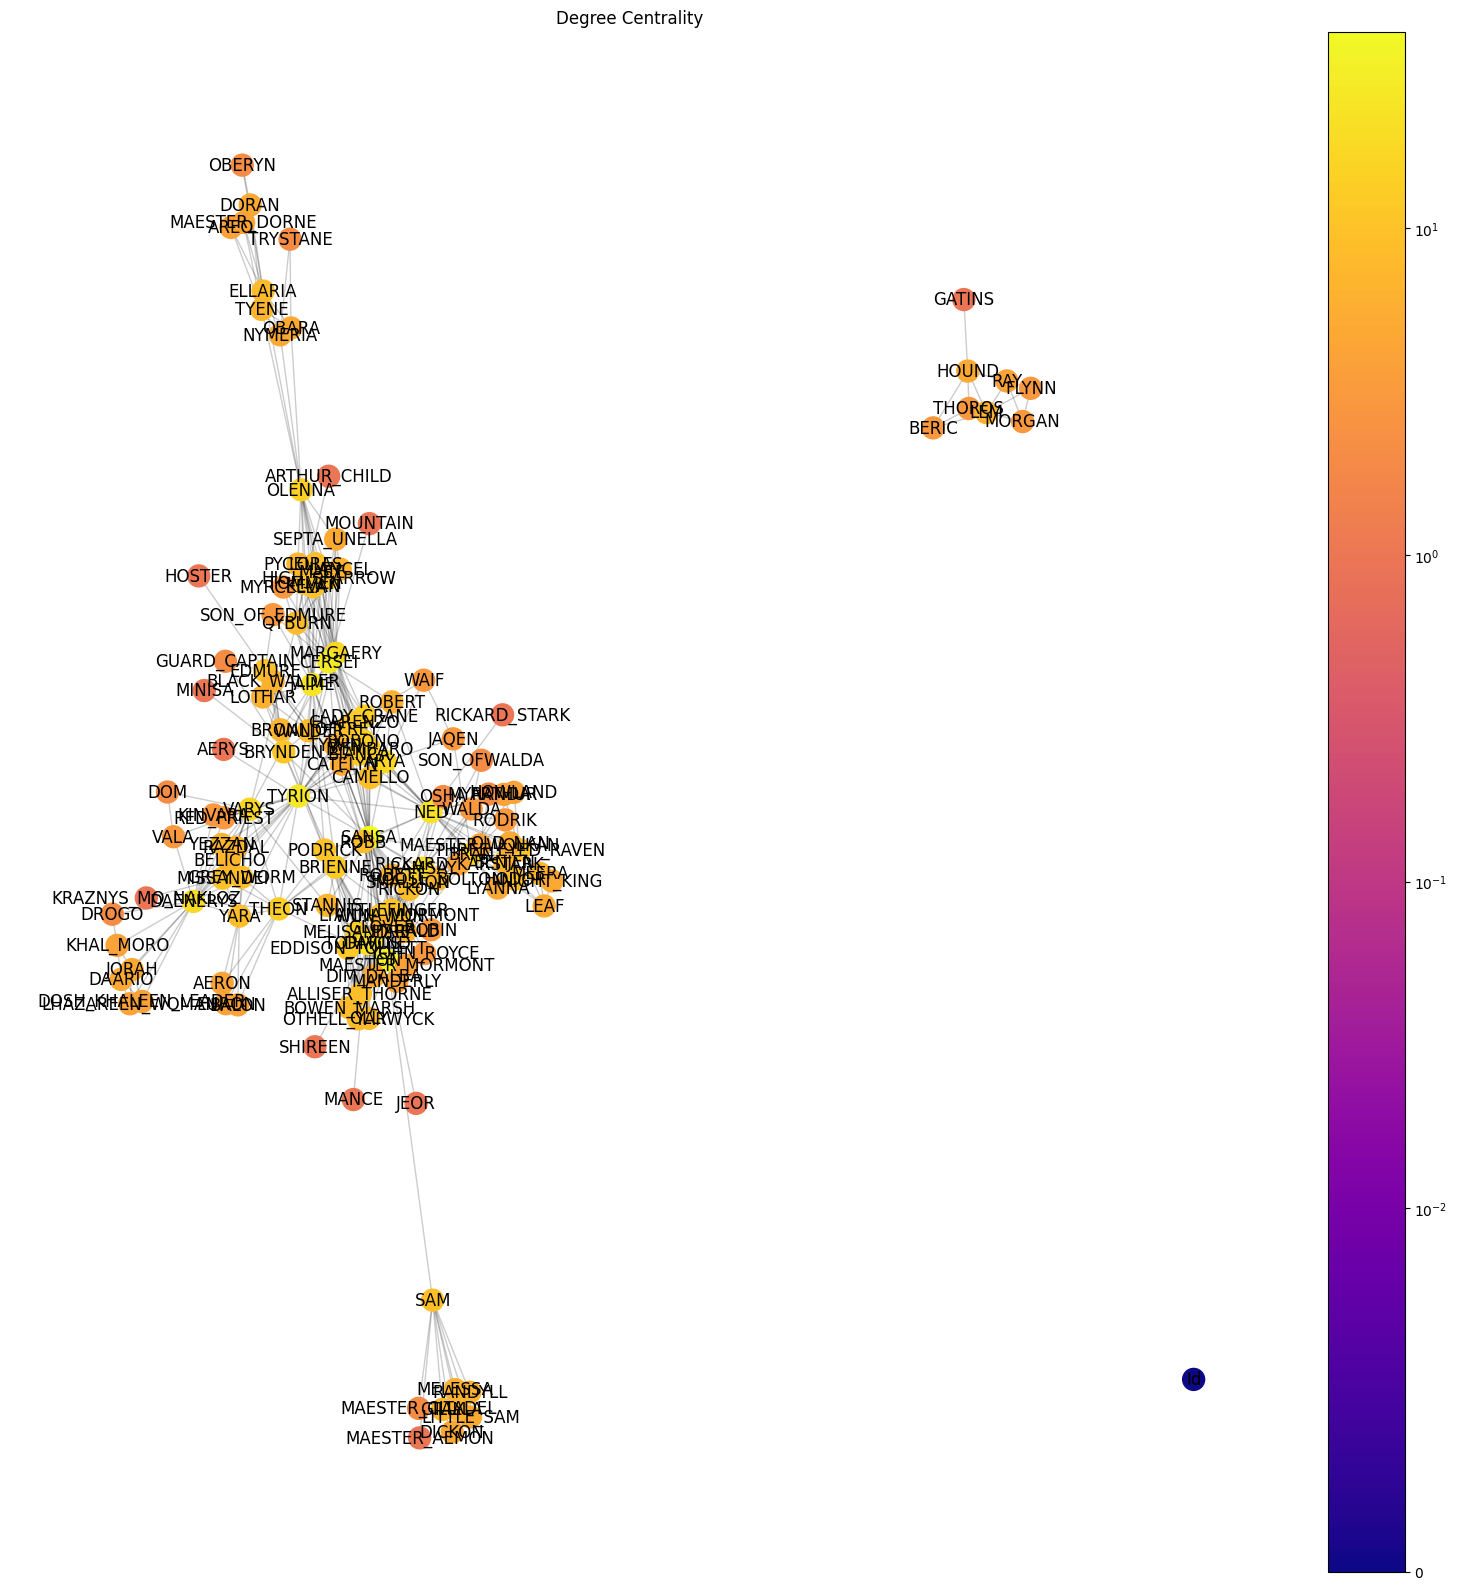

In [13]:
# 1. Графын бүх зангилааны зэрэг (degree)-ийг тодорхойлж, `degrees` нэртэй толь (dictionary) үүсгэх
degrees = dict(g.degree())

# 2. Зангилаануудыг зэргийн дагуу буурахаар (descending order) эрэмбэлж, жагсаалт үүсгэх
ranks = [(k, v) for k, v in sorted(degrees.items(), key=lambda item: -item[1])]

# 3. Хамгийн өндөр зэргийн эхний 5 зангилааг хэвлэх (List slicing ашиглаж байна)
ranks[0:5]

# 4. Графыг дүрслэх функцыг дуудах
#    - g: граф
#    - pos: зангилааны байршлын мэдээлэл
#    - degrees: зангилааны зэрэгтэй холбоотой өнгөний мэдээлэл
#    - 'Degree Centrality': зураг дээрх гарчиг
draw_net(g, pos, degrees, 'Degree Centrality')


In [14]:
# 1. Графын ойр байдлын төвшинг (Closeness Centrality) тооцоолох
closeness = nx.closeness_centrality(g)

In [15]:
# 1. Ойр байдлын төвшинг (closeness centrality) ихээс бага руу эрэмбэлж, жагсаалт үүсгэх
ranks = [(k, v) for k, v in sorted(closeness.items(), key=lambda item: -item[1])]

# 2. Хамгийн өндөр ойр байдлын төвшингийн эхний 5 зангилааг (топ 5) хэвлэх
ranks[0:5]


[('SANSA', 0.480966882375333),
 ('TYRION', 0.42661103607949064),
 ('JON', 0.4208460220784164),
 ('CERSEI', 0.4152347417840376),
 ('JAIME', 0.41112350671686887)]

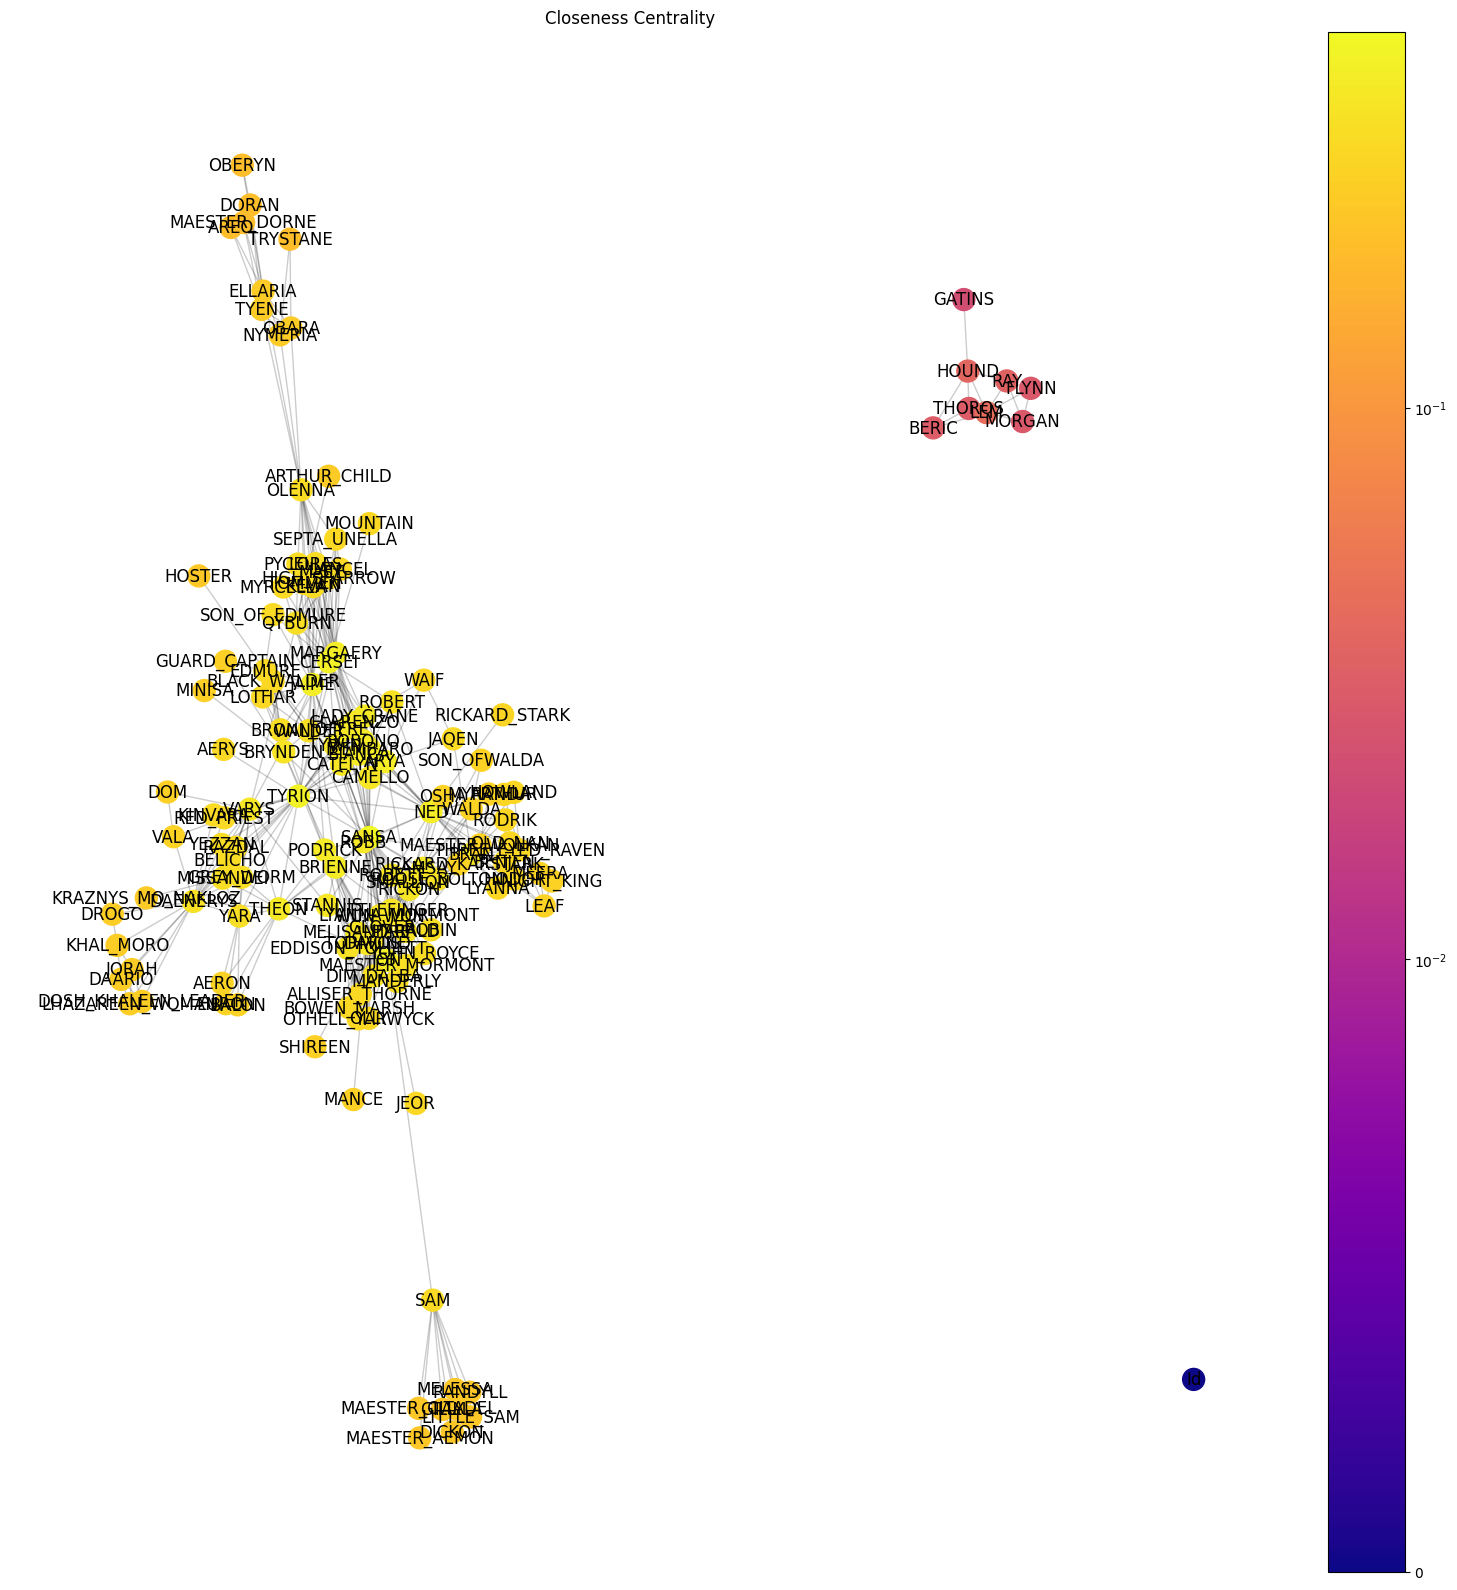

In [16]:
draw_net(g, pos, closeness, 'Closeness Centrality')

In [17]:
betweenness = nx.betweenness_centrality(g)

In [18]:
ranks = [(k, v) for k, v in sorted(betweenness.items(), key=lambda item: -item[1])]
ranks[0:5]

[('SANSA', 0.2589247706776543),
 ('JON', 0.18865041688178846),
 ('TYRION', 0.14643956731944027),
 ('JAIME', 0.12861223368885352),
 ('CERSEI', 0.1155676152654065)]

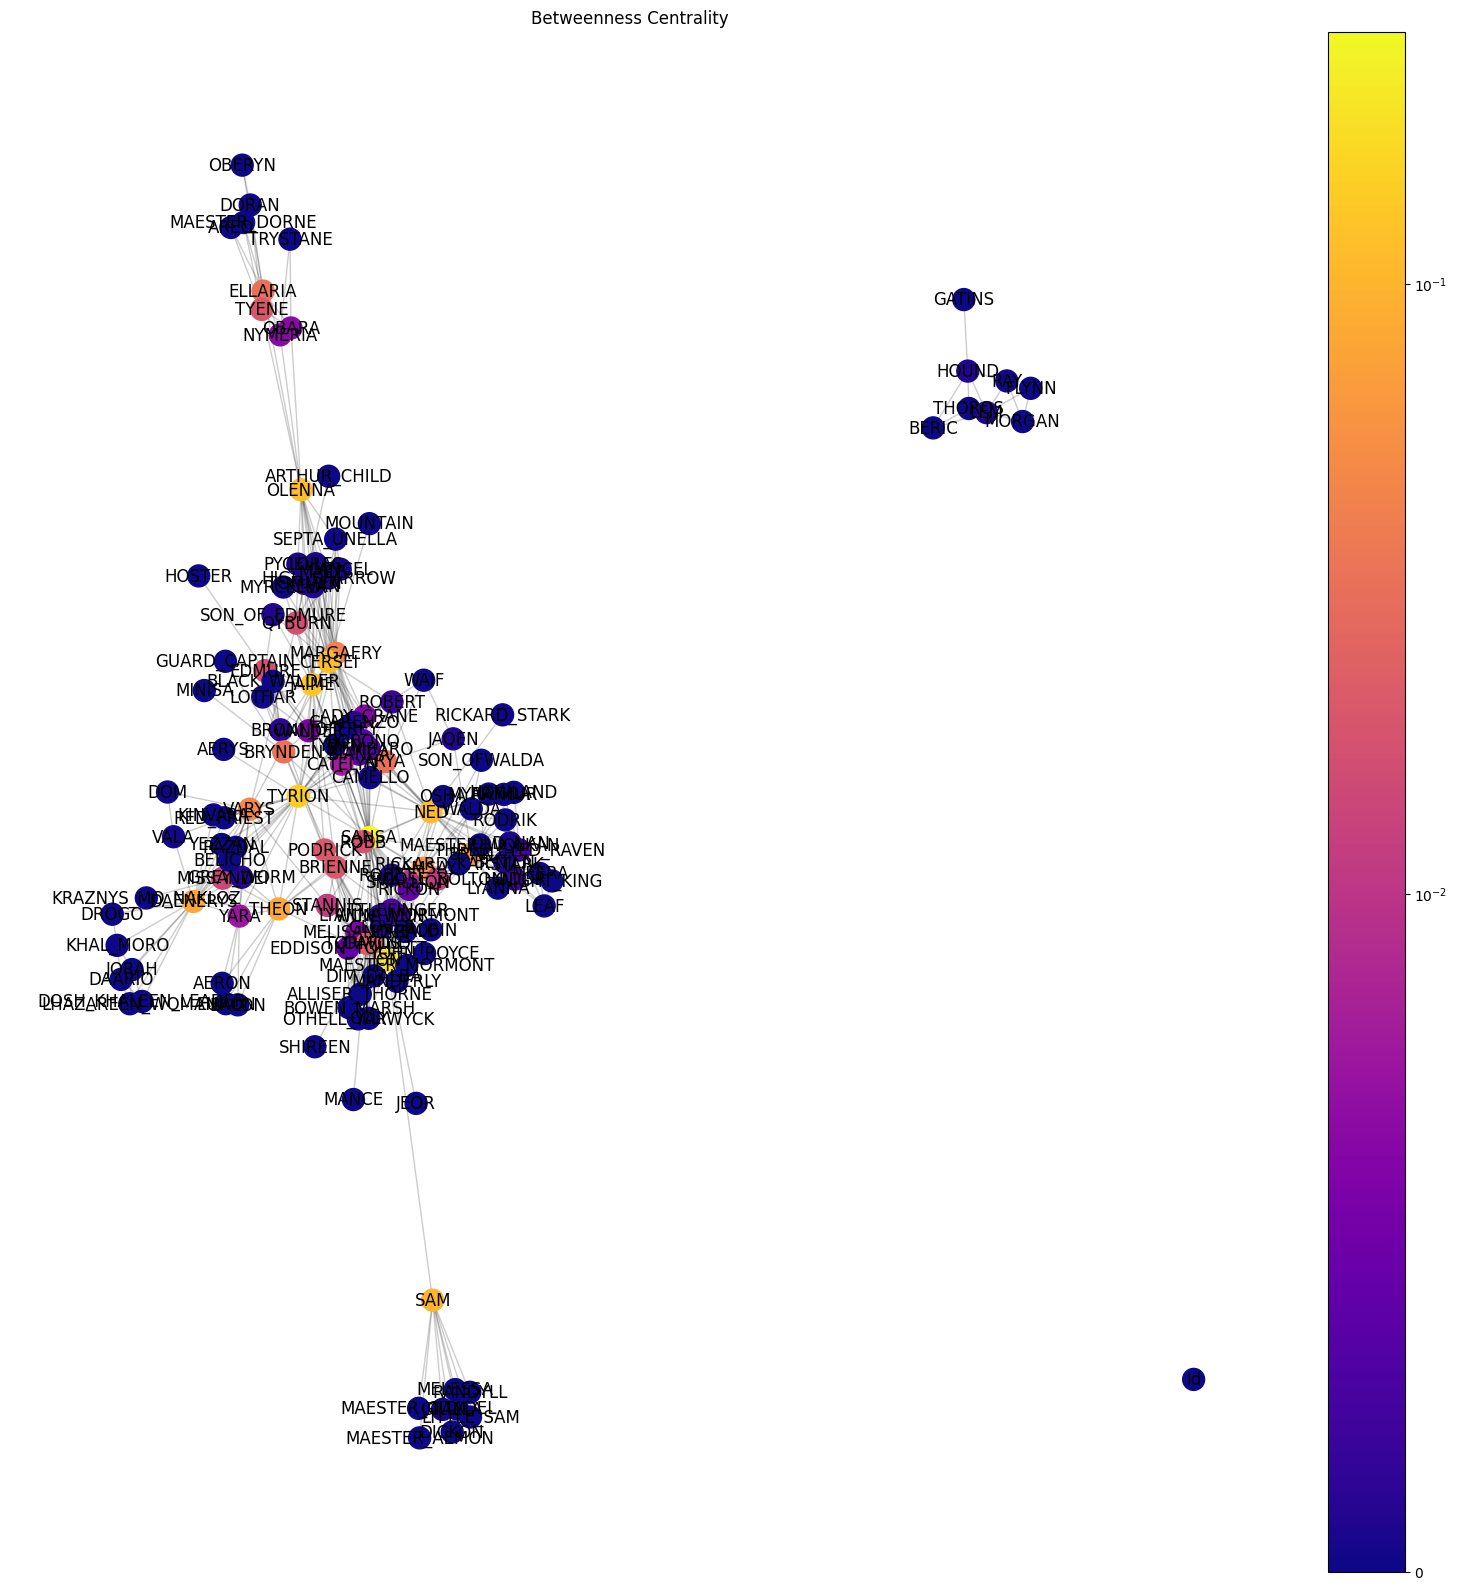

In [19]:
draw_net(g, pos, betweenness, 'Betweenness Centrality')

In [20]:
harmonic = nx.harmonic_centrality(g)

In [21]:
ranks = [(k, v) for k, v in sorted(harmonic.items(), key=lambda item: -item[1])]
ranks[0:5]

[('SANSA', 81.41666666666667),
 ('JON', 73.33333333333334),
 ('TYRION', 71.91666666666669),
 ('CERSEI', 70.5),
 ('JAIME', 69.00000000000001)]

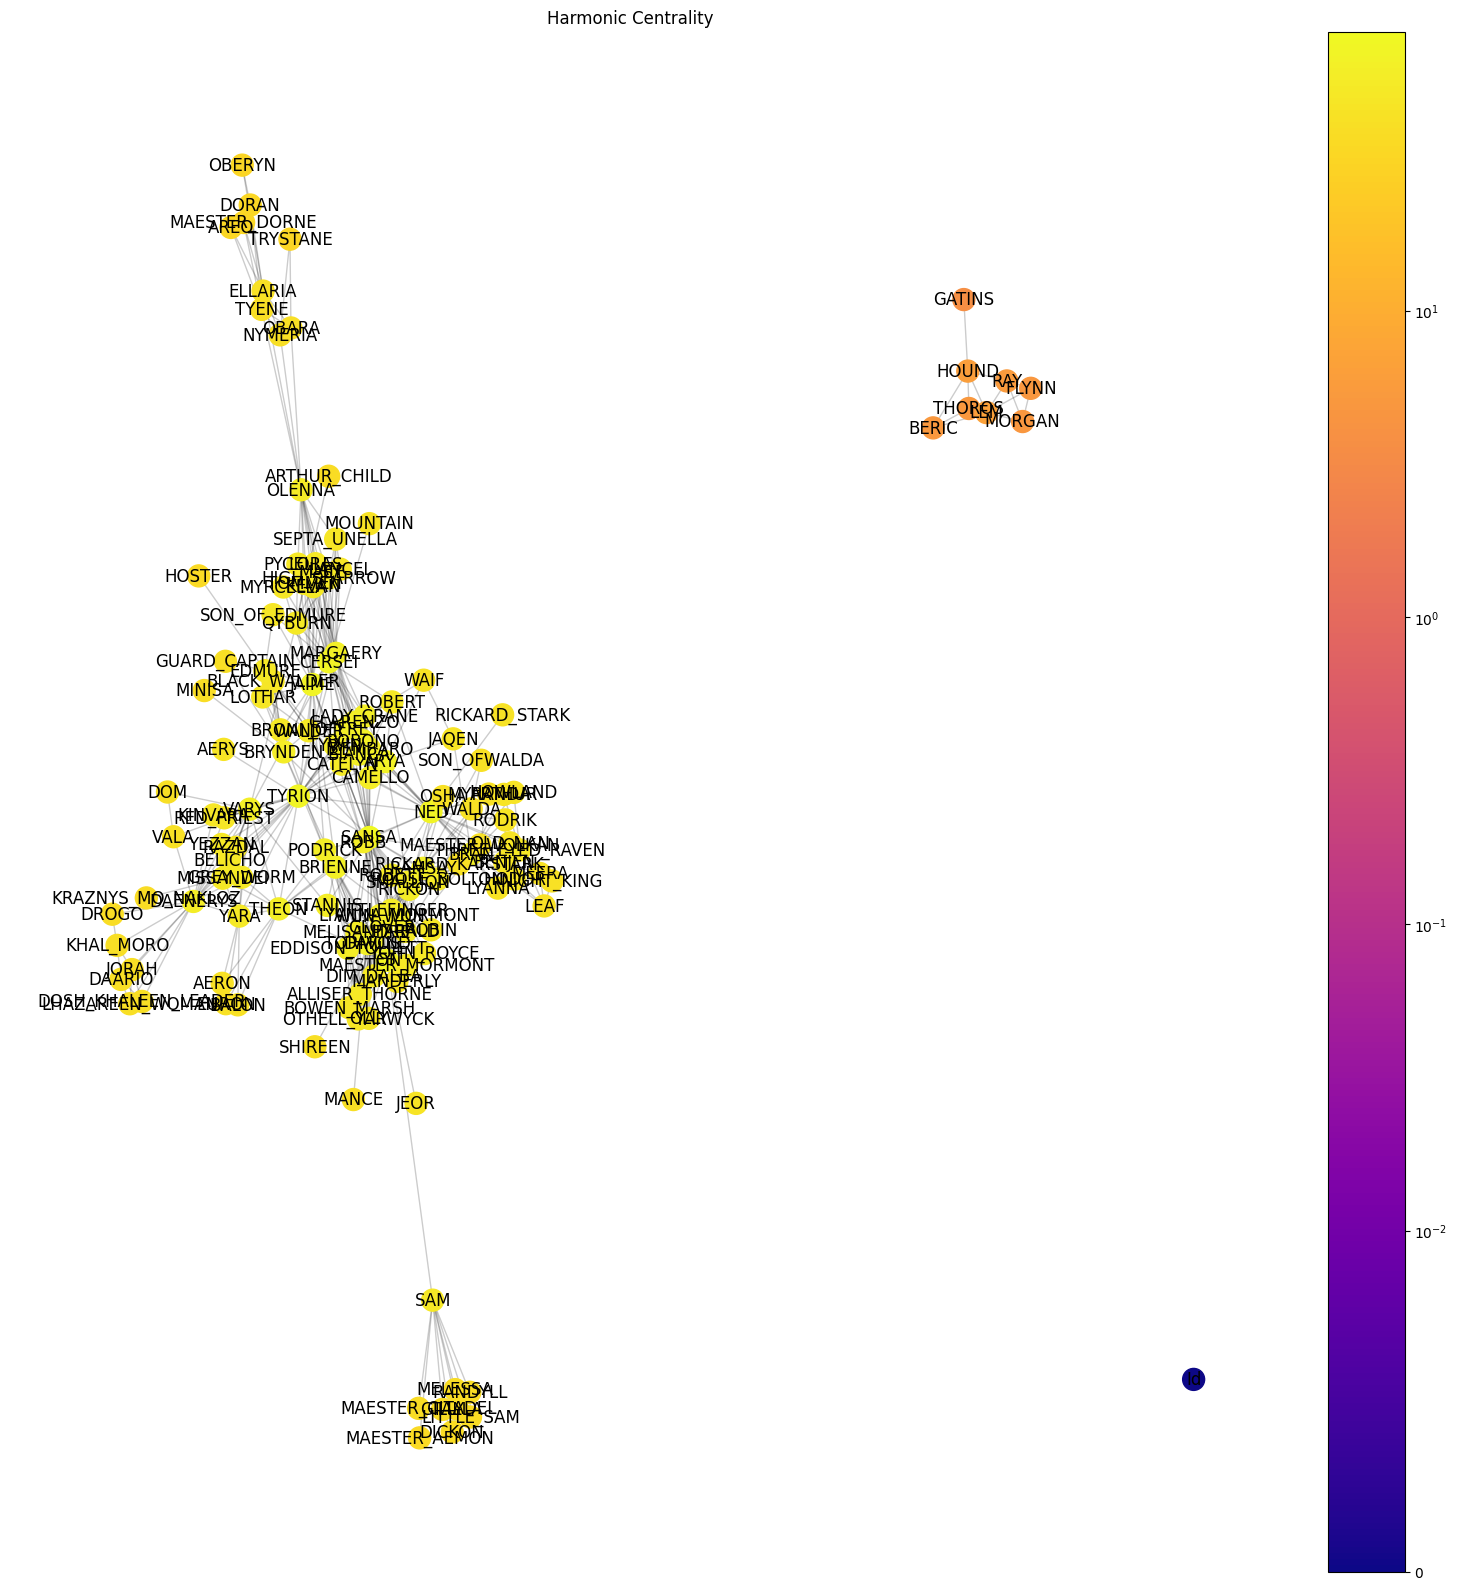

In [22]:
draw_net(g, pos, harmonic, 'Harmonic Centrality')

In [23]:
pagerank = nx.pagerank(g)

In [24]:
ranks = [(k, v) for k, v in sorted(pagerank.items(), key=lambda item: -item[1])]
ranks[0:5]

[('SANSA', 0.0283610781602461),
 ('JON', 0.02336620768889073),
 ('CERSEI', 0.020257175030860622),
 ('TYRION', 0.0201675946416887),
 ('JAIME', 0.01853234006464307)]

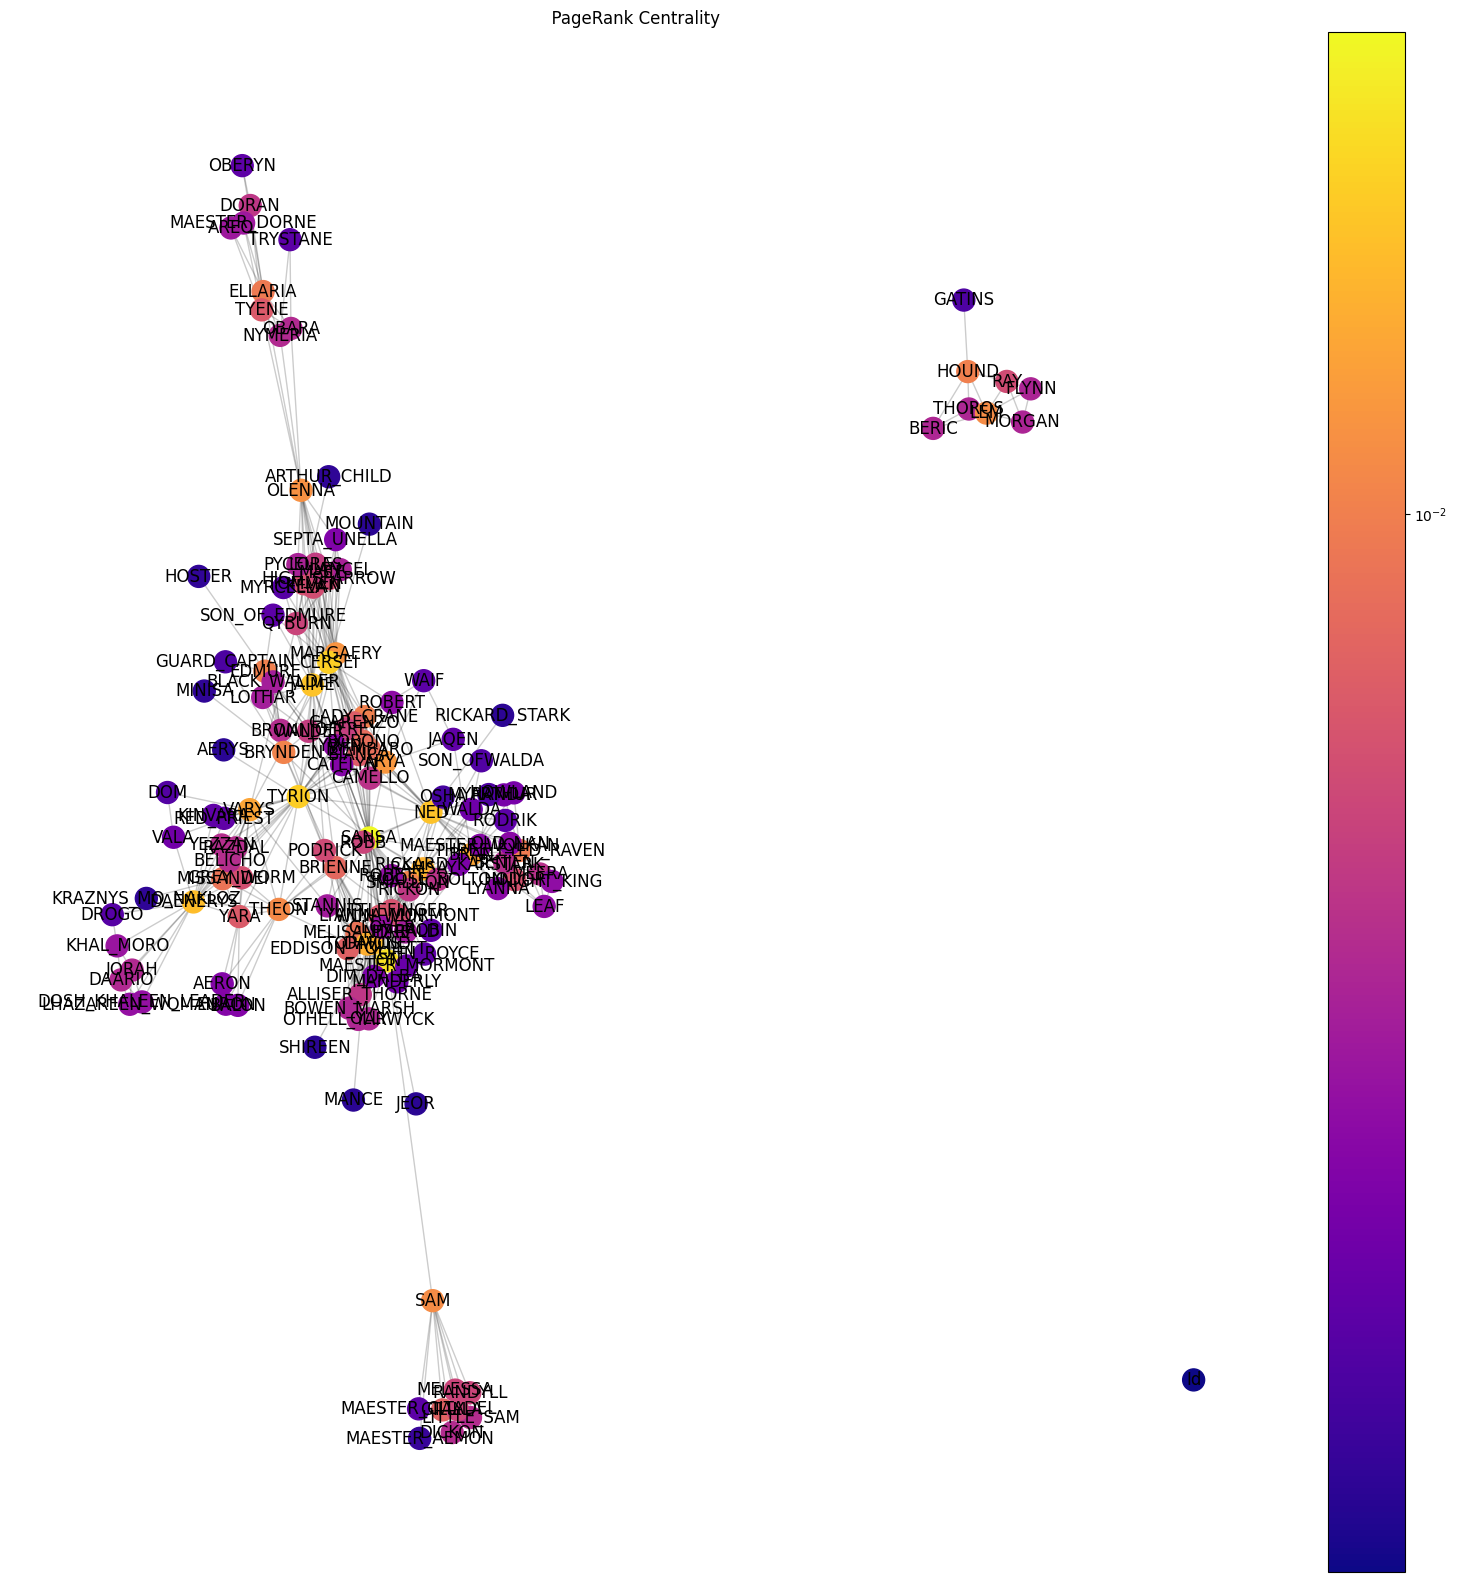

In [25]:
draw_net(g, pos, pagerank, '  PageRank Centrality')

In [26]:
eigen = nx.eigenvector_centrality(g)

In [27]:
ranks = [(k, v) for k, v in sorted(eigen.items(), key=lambda item: -item[1])]
ranks[0:5]

[('SANSA', 0.3681703250620049),
 ('JON', 0.25752583885620856),
 ('DAVOS', 0.2120919196122236),
 ('TORMUND', 0.20473555675107596),
 ('TYRION', 0.200968439452155)]

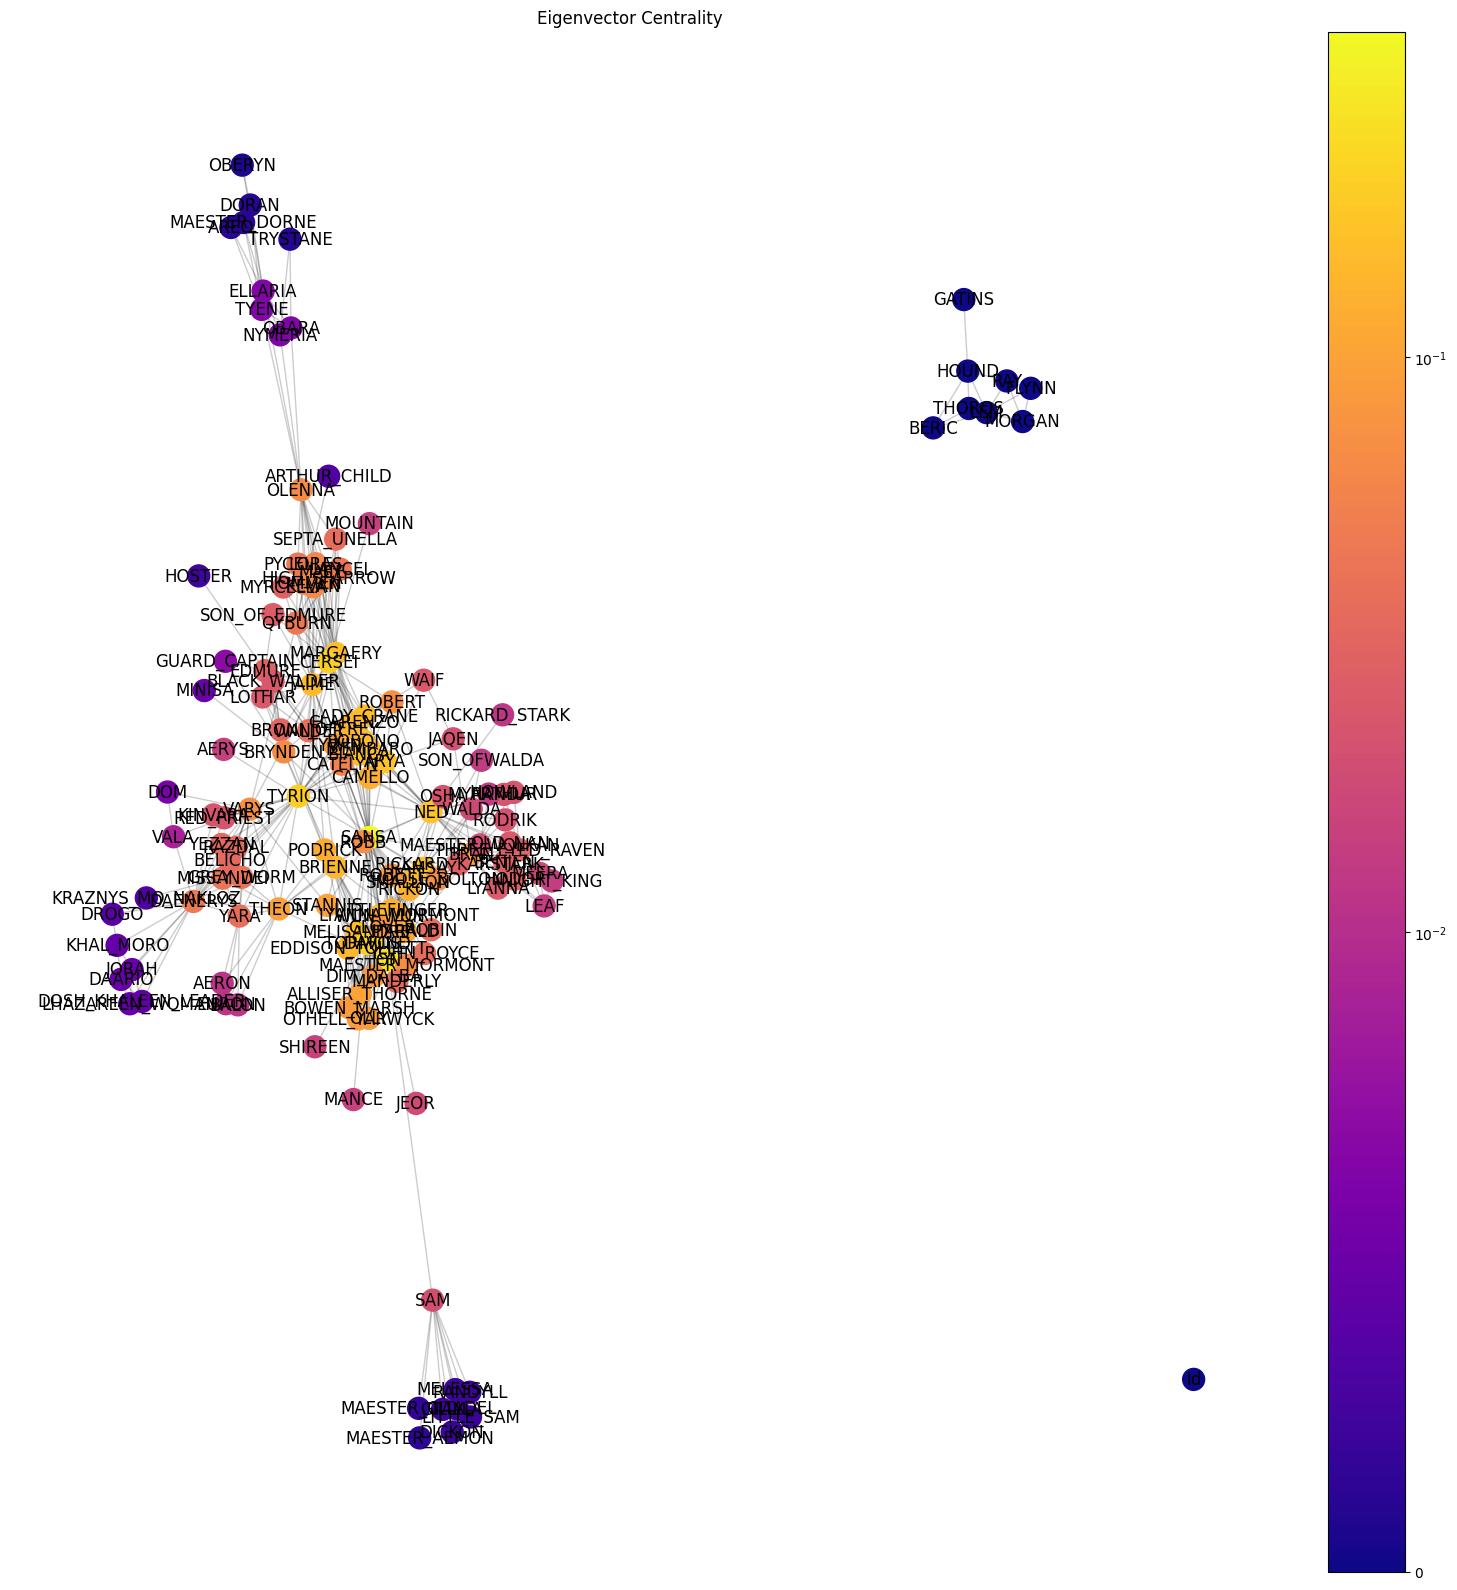

In [28]:
draw_net(g, pos, eigen, 'Eigenvector Centrality')

In [29]:
nx.degree_assortativity_coefficient(g)

-0.006283179316286593

In [30]:
# 1. Графын дундаж холболтын зэргийг (Average Degree Connectivity) тооцоолох
knn = nx.average_degree_connectivity(g)

# 2. knn-ийн утгуудыг түлхүүрээр нь (зангуйн зэрэг) өсөх дарааллаар эрэмбэлж толь (dictionary) хэлбэрт хадгалах
knn = dict(sorted(knn.items()))

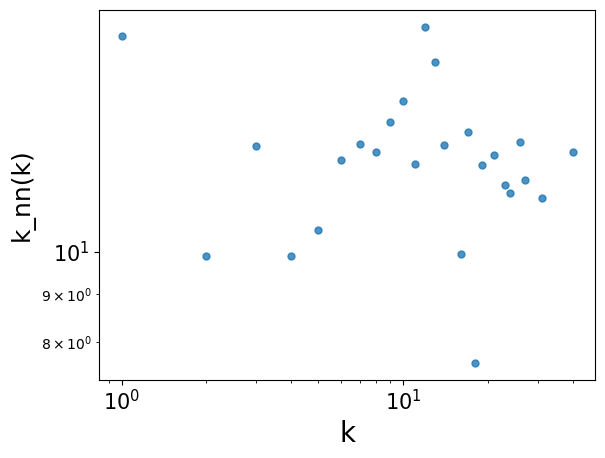

In [31]:
# 1. knn толь бичгээс түлхүүрүүдийг (k) болон утгуудыг (k_nn(k)) жагсаалт хэлбэрт оруулж, цэгэн график зурах
plt.plot(list(knn.keys()), list(knn.values()), '.', ms=10, alpha=0.8)
#    - list(knn.keys()): X тэнхлэг дээр зангилааны зэрэг (k) байрлана
#    - list(knn.values()): Y тэнхлэг дээр тухайн зэрэгтэй зангилаануудын дундаж холболтын зэрэг (k_nn(k)) байрлана
#    - '.' → Цэгэн график ашиглаж байна
#    - ms=10 → Цэгийн хэмжээг 10 пиксель болгож томруулна
#    - alpha=0.8 → Цэгүүдийг бага зэрэг тунгалаг болгоно (80% харагдана)

# 2. X болон Y тэнхлэгийг логарифмын масштабаар харуулах
plt.loglog()
#    - Энэ нь x болон y тэнхлэгийг лог-шкалд оруулж, өгөгдлийн хамаарлыг илүү тод харуулна

# 3. X тэнхлэгийн гарчгийг том фонтоор тохируулах
plt.xlabel("k", fontsize=20)
#    - "k" → Зангилааны зэрэг (degree)
#    - fontsize=20 → Фонтын хэмжээг томруулна

# 4. Y тэнхлэгийн гарчгийг том фонтоор тохируулах
plt.ylabel("k_nn(k)", fontsize=18)
#    - "k_nn(k)" → k зэрэгтэй зангилаануудын дундаж холболтын зэрэг
#    - fontsize=18 → Фонтын хэмжээг томруулна

# 5. X болон Y тэнхлэгийн тоонуудын хэмжээг томруулж уншихад хялбар болгох
plt.xticks(fontsize=15)  # X тэнхлэгийн тэмдэгтийн хэмжээ 15 пиксель
plt.yticks(fontsize=15)  # Y тэнхлэгийн тэмдэгтийн хэмжээ 15 пиксель

# 6. Бүх тохиргоотойгоор графикийг дүрслэх
plt.show()


In [32]:
nx.attribute_assortativity_coefficient(g, 'house')

0.2074748054739662

In [33]:
h = g.copy()

In [34]:
!pip install --upgrade "pip<24.1"
!pip install node_conformity

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
DEPRECATION: node-conformity 0.0.2 has a non-standard dependency specifier numpy>=1.15.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of node-conformity or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: node-conformity 0.0.2 has a non-standard dependency specifier tqdm>=4.20.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of node-conformity or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [35]:
# 1. "attribute_conformity" функцийг агуулсан conformity санг импортлох
from conformity import attribute_conformity

# 2. Өгөгдлийг боловсруулахад ашиглах pandas санг импортлох
import pandas as pd

# 3. h графын холбогдсон бүх бүрэлдэхүүн хэсгүүдийг (connected components) томоос жижиг рүү эрэмбэлэх
gcc = sorted(nx.connected_components(h), key=len, reverse=True)
#    - nx.connected_components(h): Графын бүх холбогдсон хэсгүүдийг олно
#    - sorted(..., key=len, reverse=True): Эдгээр хэсгүүдийг хэмжээгээр нь буурах эрэмбээр ангилна
#    - gcc[0]: Хамгийн том холбогдсон хэсгийг авна

# 4. Графын хамгийн том холбогдсон бүрэлдэхүүн хэсгийг `h0` хувьсагчид хадгалах
h0 = h.subgraph(gcc[0])
#    - h.subgraph(gcc[0]): `h` графаас хамгийн том холбогдсон дэд графыг үүсгэх

# 5. Альфа утгуудын жагсаалтыг үүсгэх (конформитиг хэмжих олонлог)
alphas = [1.0, 2.0, 3.0, 4.0, 5.0]
#    - Эдгээр утгууд нь attribute conformity хэмжилтийн параметрүүд

# 6. Графын "house" атрибут дээр тулгуурлан attribute conformity хэмжилтийг гүйцэтгэх
res = attribute_conformity(h0, alphas, ['house'], profile_size=1)
#    - h0: Хамгийн том холбогдсон дэд граф дээр анализ хийх
#    - alphas: Конформити хэмжилт хийх альфа утгууд
#    - ['house']: Судлах шинж чанарын нэр (зангилаануудын `house` атрибут)
#    - profile_size=1: Хэмжилтийн тохиргоо (энэ нь нэг хэрэглэгчийн профайл дээр суурилсан байж магадгүй)


100%|██████████| 134/134 [00:00<00:00, 225.05it/s]


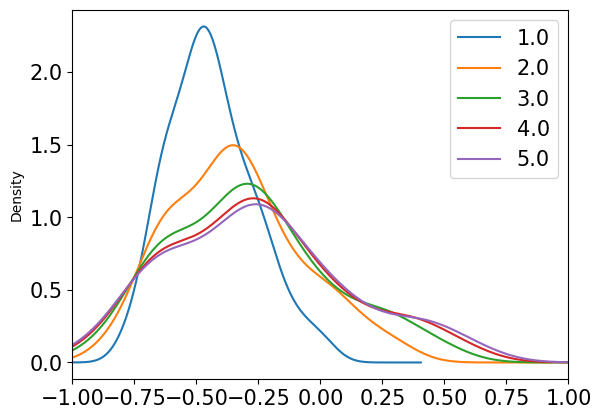

In [36]:
# 1. `plt.subplots()` ашиглан зураглалын figure болон тэнхлэг (ax) үүсгэх
_, ax = plt.subplots()

# 2. `res`-ээс альфа утгууд болон профайл бүрийн өгөгдлийг давталтаар авах
for alpha, profiles in res.items():
    # 3. Альфа утга бүрийн профайл дахь өгөгдлийг гүйцэтгэх
    for profile, data in profiles.items():
        # 4. Өгөгдлийг датафрейм болгон хөрвүүлэх
        df = pd.DataFrame(list(data.values()), columns=[alpha])
        #    - `list(data.values())` → Профайлын өгөгдлийг жагсаалт хэлбэрээр авах
        #    - `columns=[alpha]` → Альфа утгыг баганын нэрээр тохируулах

        # 5. KDE (Kernel Density Estimation) график зурах
        df.plot.kde(ax=ax)
        #    - `ax=ax` → Бүх графикуудыг нэг тэнхлэг (ax) дээр зурна

# 6. X тэнхлэгийн тэмдэгтийн (ticks) фонтыг томруулах
plt.xticks(fontsize=15)

# 7. Y тэнхлэгийн тэмдэгтийн фонтыг томруулах
plt.yticks(fontsize=15)

# 8. X тэнхлэгийн хязгаарыг -1-ээс 1 хүртэл тогтоох
plt.xlim((-1, 1))

# 9. Графикуудын тайлбарыг тохируулах
plt.legend(fontsize=15)

# 10. Графикийг дүрслэх
plt.show()


In [37]:
conf_a3 = res['3.0']['house']

In [38]:
node_assortativity = [(k, v) for k, v in sorted(conf_a3.items(), key=lambda item: item[1])]

In [39]:
for nd in node_assortativity[0:5]:
    print(f"{nd[0]: >20}\t{nd[1]: >10}\t{h.nodes[nd[0]]['house']: >20}")

                JEOR	-0.931038573874242	       Night's Watch
             SHIREEN	-0.9287300518300002	           Baratheon
               GILLY	-0.816164752888596	           Wildlings
        ARTHUR_CHILD	-0.8074085546571529	            Commoner
     MAESTER_CITADEL	-0.778874474317457	             Citadel


In [40]:
for nd in list(reversed(node_assortativity[-6:-1])):
    print(f"{nd[0]: >20}\t{nd[1]: >10}\t{h.nodes[nd[0]]['house']: >20}")

              LYANNA	0.48983121524161594	               Stark
       RICKARD_STARK	0.44896734570683966	               Stark
         SON_OFWALDA	0.4376999846379132	              Bolton
              BENJEN	0.3502922883738541	               Stark
               WALDA	0.33535527594258246	              Bolton


In [41]:
na = {c[0]: c[1] for c in node_assortativity}

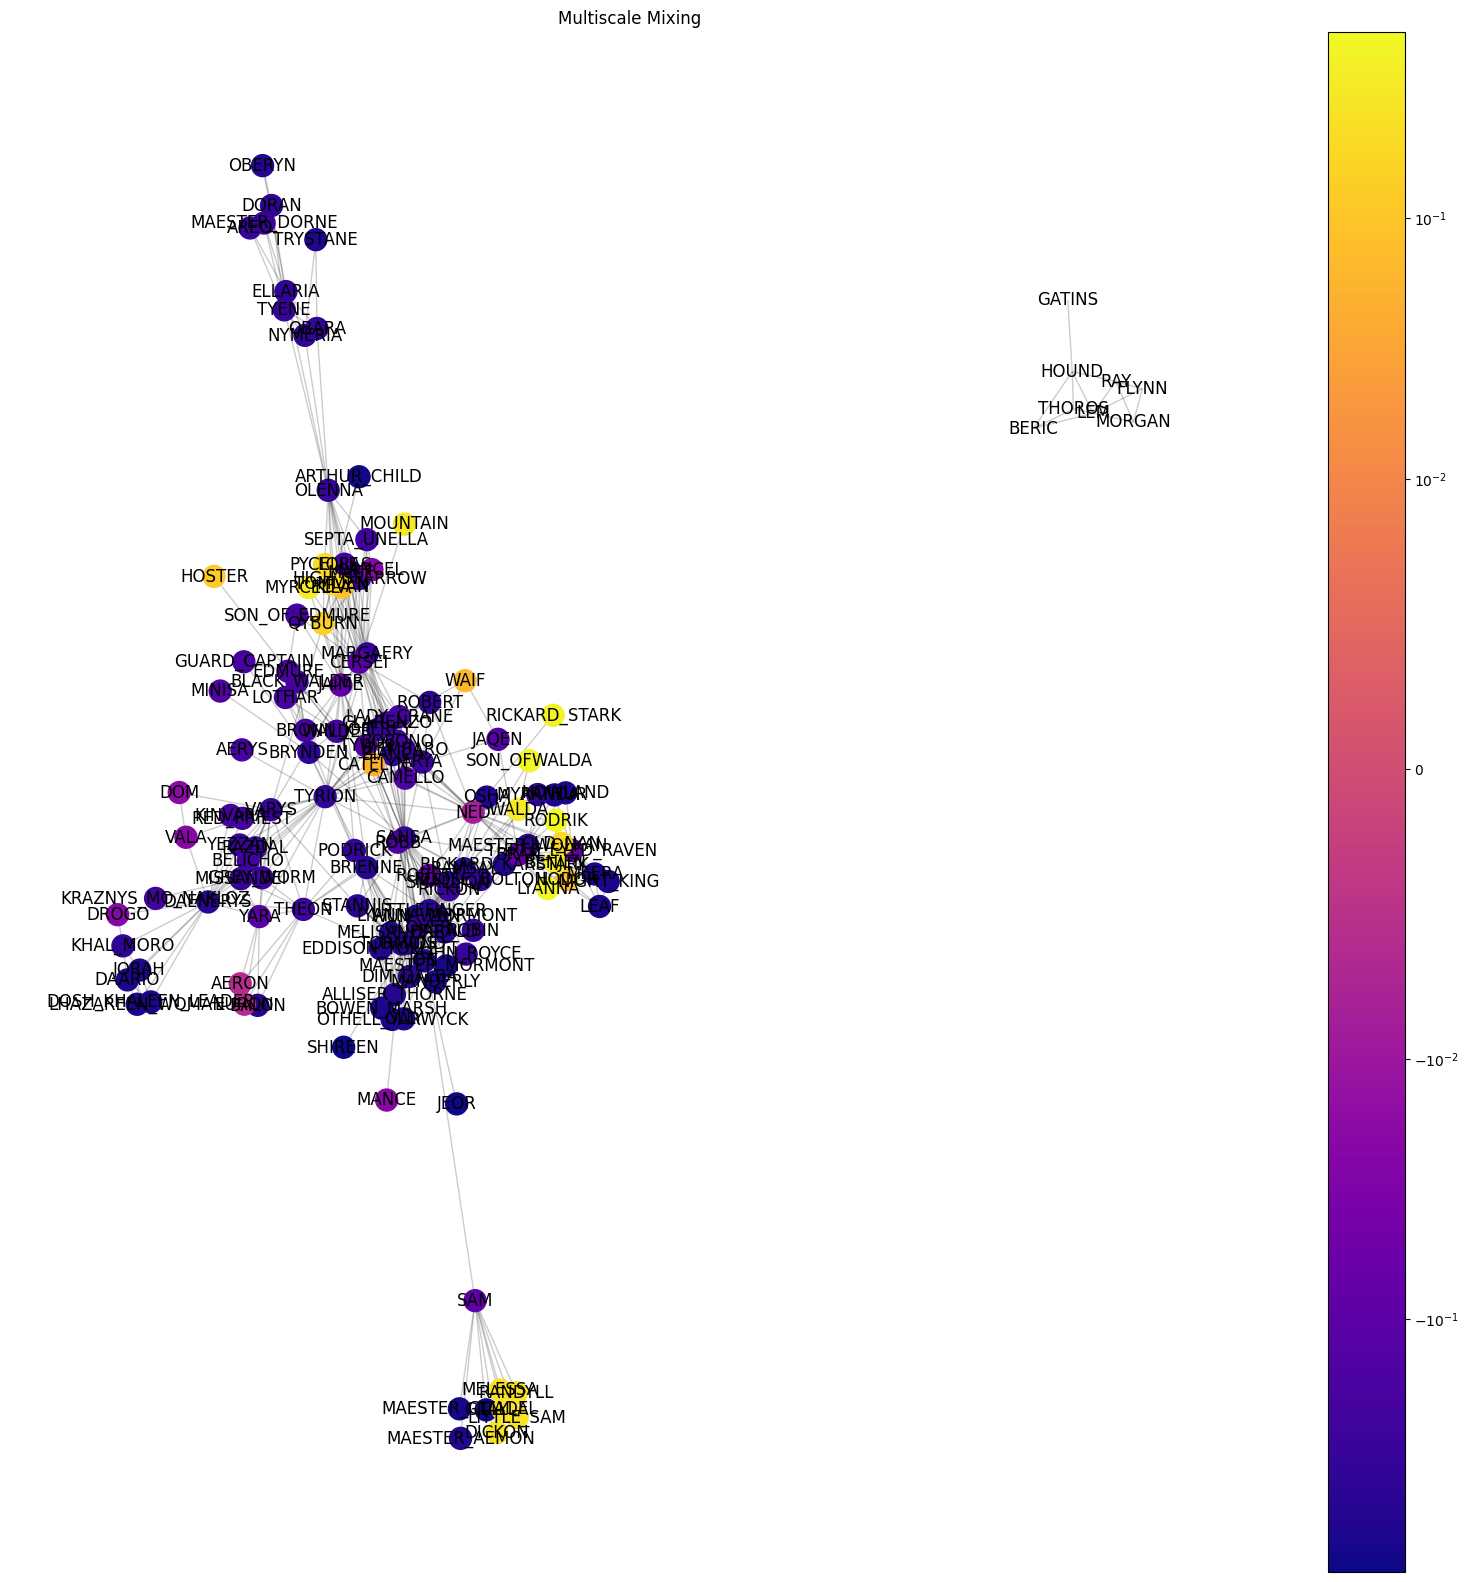

In [42]:
draw_net(h, pos, na, "Multiscale Mixing")

In [43]:
# 1. NetworkX болон Pandas сангуудыг импортлох
import networkx as nx
import pandas as pd

# 2. Шинэ граф үүсгэх (Undirected Graph)
G = nx.Graph()

# 3. Графад нэмэх ирмэгүүдийг тодорхойлох (холболтуудын жагсаалт)
edges = [(1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (4, 5)]

# 4. Графад ирмэгүүдийг нэмэх
G.add_edges_from(edges)

# 5. Графын degree centrality-г тооцоолох
degree_centrality = nx.degree_centrality(G)

# 6. Хэвлэх: Undirected Graph-ийн Degree Centrality
print("Degree Centrality for Undirected Graph:")

# 7. Бүх зангилааны centrality утгуудыг хэвлэх
for node, centrality in degree_centrality.items():
    print(f"Node {node}: {centrality}")

# 8. Шинэ чиглэлтэй граф үүсгэх (Directed Graph)
DG = nx.DiGraph()

# 9. Чиглэлтэй графад нэмэх ирмэгүүдийг тодорхойлох
edges = [(1, 2), (2, 3), (3, 1), (3, 4), (4, 5)]

# 10. Чиглэлтэй графад ирмэгүүдийг нэмэх
DG.add_edges_from(edges)

# 11. In-degree centrality-г тооцоолох
in_degree_centrality = nx.in_degree_centrality(DG)

# 12. Out-degree centrality-г тооцоолох
out_degree_centrality = nx.out_degree_centrality(DG)

# 13. Хэвлэх: Чиглэлтэй графын In-degree centrality
print("\nIn-Degree Centrality for Directed Graph:")

# 14. Бүх зангилааны in-degree centrality утгуудыг хэвлэх
for node, centrality in in_degree_centrality.items():
    print(f"Node {node}: {centrality}")

# 15. Хэвлэх: Чиглэлтэй графын Out-degree centrality
print("\nOut-Degree Centrality for Directed Graph:")

# 16. Бүх зангилааны out-degree centrality утгуудыг хэвлэх
for node, centrality in out_degree_centrality.items():
    print(f"Node {node}: {centrality}")

# 17. CSV файл унших (Эх сурвалж болон зорилтот зангилаануудтай өгөгдөл)
df = pd.read_csv("/content/source_target_dataset.csv")

# 18. Pandas DataFrame-аас чиглэлтэй граф үүсгэх
G = nx.from_pandas_edgelist(df, source="source", target="target", create_using=nx.DiGraph())

# 19. Degree centrality-г тооцоолох
degree_centrality = nx.degree_centrality(G)

# 20. Топ 10 нөлөө бүхий хэрэглэгчдийг олох (Degree Centrality-ийн дагуу)
top_influencers = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# 21. Хэвлэх: Degree Centrality дээр тулгуурласан хамгийн нөлөөтэй 10 хэрэглэгч
print("\nTop 10 Influencers based on Degree Centrality:")

# 22. Топ хэрэглэгчдийн мэдээллийг хэвлэх
for node, centrality in top_influencers:
    print(f"User {node}: {centrality}")


Degree Centrality for Undirected Graph:
Node 1: 0.5
Node 2: 0.75
Node 3: 0.75
Node 4: 0.75
Node 5: 0.25

In-Degree Centrality for Directed Graph:
Node 1: 0.25
Node 2: 0.25
Node 3: 0.25
Node 4: 0.25
Node 5: 0.25

Out-Degree Centrality for Directed Graph:
Node 1: 0.25
Node 2: 0.25
Node 3: 0.5
Node 4: 0.25
Node 5: 0.0

Top 10 Influencers based on Degree Centrality:
User Good morning: 0.25
User Hello: 0.125
User Hi: 0.125
User How are you?: 0.125
User I'm good, thanks!: 0.125
User What's your name?: 0.125
User My name is John.: 0.125
User Goodbye: 0.125
User See you later: 0.125
